In [6]:
import pandas as pd

lingkungan = {'suhu': [23, 27, 22, 25, 24], 
            'kelembapan': [68, 72, 80, 64, 70]}

lingkungan_df = pd.DataFrame(lingkungan)
lingkungan_df

,suhu,kelembapan
0,23,68
1,27,72
2,22,80
3,25,64
4,24,70


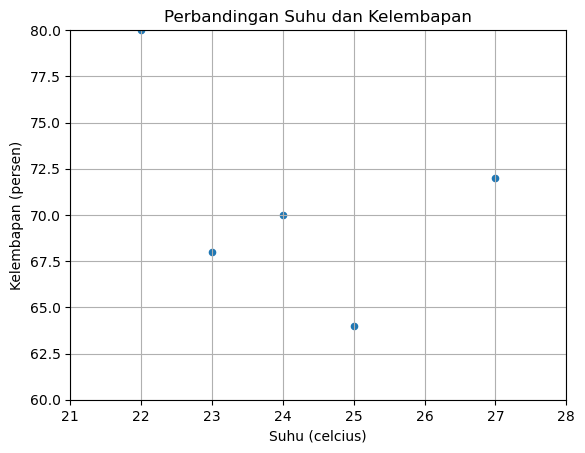

In [11]:
import matplotlib.pyplot as plt

lingkungan_df.plot(kind='scatter', x='suhu', y='kelembapan')

plt.title('Perbandingan Suhu dan Kelembapan')
plt.xlabel('Suhu (celcius)')
plt.ylabel('Kelembapan (persen)')
plt.xlim(21, 28)
plt.ylim(60, 80)
plt.grid(True)
plt.show()

In [12]:
import numpy as np

X = np.array(lingkungan_df['suhu'])
y = np.array(lingkungan_df['kelembapan'])

print(f'X: {X}')
print(f'y: {y}')

X: [23 27 22 25 24]
y: [68 72 80 64 70]


In [13]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

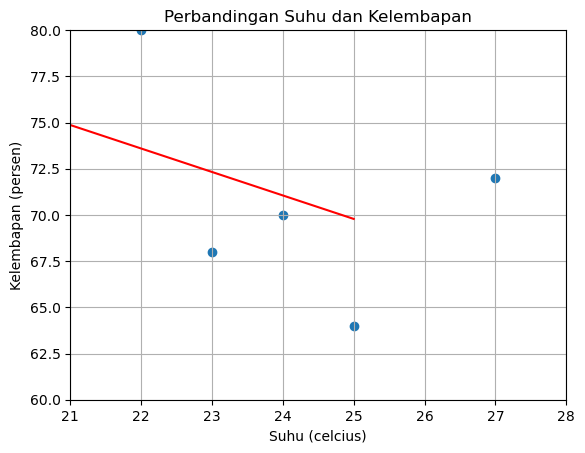

In [16]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Suhu dan Kelembapan')
plt.xlabel('Suhu (celcius)')
plt.ylabel('Kelembapan (persen)')
plt.xlim(21, 28)
plt.ylim(60, 80)
plt.grid(True)
plt.show()


In [17]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 101.54054054054055
slope: [-1.27027027]


In [18]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[23]
 [27]
 [22]
 [25]
 [24]]

X flatten: [23 27 22 25 24]

y: [68 72 80 64 70]


In [19]:
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 3.7


In [20]:
np.cov(X.flatten(), y)

array([[ 3.7, -4.7],
       [-4.7, 35.2]])

In [21]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: -4.699999999999999


In [22]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: -1.27027027027027


In [23]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

intercept: 101.54054054054053


In [30]:
suhu_lingkungan = np.array([28, 21, 23]).reshape(-1, 1)
suhu_lingkungan

array([[28],
       [21],
       [23]])

In [31]:
prediksi_kelembapan = model.predict(suhu_lingkungan)
prediksi_kelembapan

array([65.97297297, 74.86486486, 72.32432432])

In [32]:
for sh, lmbp in zip(suhu_lingkungan, prediksi_kelembapan):
    print(f'Suhu: {sh} Prediksi Kelembapan: {lmbp}')

Suhu: [28] Prediksi Kelembapan: 65.97297297297297
Suhu: [21] Prediksi Kelembapan: 74.86486486486487
Suhu: [23] Prediksi Kelembapan: 72.32432432432432


In [33]:
X_train = np.array([24, 25, 22, 27, 21]).reshape(-1, 1)
y_train = np.array([65, 72, 66, 74, 68])

X_test = np.array([22, 28, 21, 27, 22]).reshape(-1, 1)
y_test = np.array([66, 76, 68, 78, 65])

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.7146398505083638


In [36]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 40.86357340720231


In [37]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 143.2


In [38]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.7146398505083638
